<a href="https://colab.research.google.com/github/4Kaustubh/Predictive_Sampling-1/blob/main/Predictive_Sampling-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

<ipython-input-4-ad70a4914327>:55: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample2 = grouped.apply(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: Convergen

         Logistic Regression  Decision Tree  Gradient Boosting       SVM  \
Sample1             0.918033       0.934426           0.934426  0.721311   
Sample2             0.950820       0.885246           0.934426  0.754098   
Sample3             0.983607       0.934426           0.950820  0.688525   
Sample4             0.950820       0.901639           0.934426  0.622951   
Sample5             0.950820       0.950820           0.967213  0.639344   

             k-NN  
Sample1  0.655738  
Sample2  0.754098  
Sample3  0.754098  
Sample4  0.737705  
Sample5  0.754098  
         Logistic Regression  Decision Tree  Gradient Boosting       SVM  \
Sample1             0.918033       0.934426           0.934426  0.721311   
Sample2             0.950820       0.885246           0.934426  0.754098   
Sample3             0.983607       0.934426           0.950820  0.688525   
Sample4             0.950820       0.901639           0.934426  0.622951   
Sample5             0.950820       0.950820

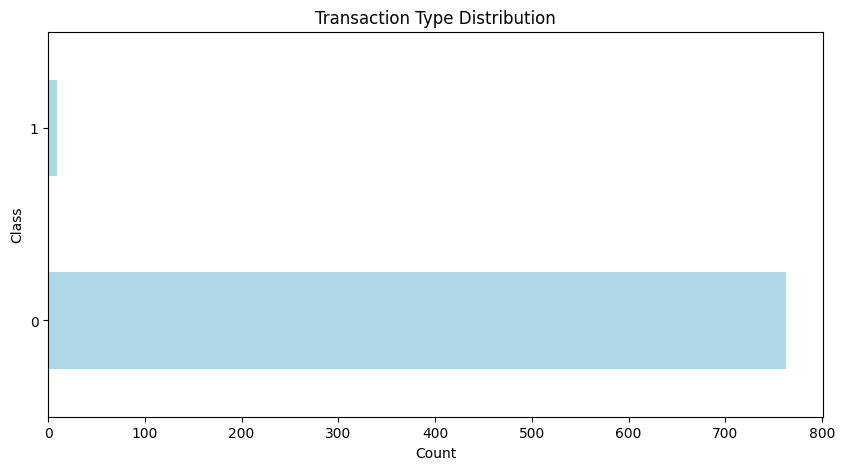

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

transaction_data = pd.read_csv('Creditcard_data.csv')

transaction_data.head()
transaction_data.info()
transaction_data.describe()

fraud_distribution = transaction_data["Class"].value_counts()
print("Transaction Types:")
print(fraud_distribution)

null_count = transaction_data.isna().sum()
print("Null Values Per Feature:")
print(null_count)

normal_trans = transaction_data[transaction_data['Class'] == 0]
fraud_trans = transaction_data[transaction_data['Class'] == 1]
print('Normal transactions:', normal_trans.shape)
print('Fraudulent transactions:', fraud_trans.shape)

plt.figure(figsize=(10, 5))
fraud_distribution.plot(kind='barh', color='lightblue',
                       title="Transaction Type Distribution")
plt.xlabel("Count")
plt.ylabel("Class")

from imblearn.over_sampling import SMOTE
from collections import Counter

target = transaction_data['Class']
features = transaction_data.drop(['Class'], axis=1)

smote_balancer = SMOTE(random_state=42)
features_balanced, target_balanced = smote_balancer.fit_resample(features, target)

processed_data = pd.concat([
    pd.DataFrame(features_balanced),
    pd.DataFrame(target_balanced, columns=['Class'])
], axis=1)

print("Balanced dataset shape:", processed_data.shape)
print("Class distribution:\n", processed_data['Class'].value_counts())

from sklearn.model_selection import train_test_split

# 1. Random Sample
sample1 = processed_data.sample(n=int(0.2 * len(processed_data)),
                              random_state=42)

# 2. Stratified Sample
grouped = processed_data.groupby('Class')
sample2 = grouped.apply(
    lambda x: x.sample(int(0.2 * len(x)), random_state=42)
).reset_index(drop=True)

# 3. Systematic Sample
interval = len(processed_data) // int(0.2 * len(processed_data))
offset = np.random.randint(0, interval)
sample3 = processed_data.iloc[offset::interval]

# 4. Cluster Sample
n_groups = 5
group_ids = np.arange(len(processed_data)) % n_groups
processed_data['Group'] = group_ids
selected_group = np.random.randint(0, n_groups)
sample4 = processed_data[processed_data['Group'] == selected_group].drop('Group', axis=1)

# 5. Bootstrap Sample
sample5 = processed_data.sample(n=int(0.2 * len(processed_data)),
                              replace=True,
                              random_state=42)

print("Sample sizes:", len(sample1), len(sample2), len(sample3), len(sample4), len(sample5))

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100,
                                                   learning_rate=0.1,
                                                   max_depth=3,
                                                   random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

performance_metrics = {}
sample_set = [sample1, sample2, sample3, sample4, sample5]

for model_name, classifier in classifiers.items():
    performance_metrics[model_name] = []

    for i, sample in enumerate(sample_set):
        X = sample.drop('Class', axis=1)
        y = sample['Class']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        performance_metrics[model_name].append(accuracy)

results_table = pd.DataFrame(
    performance_metrics,
    index=["Sample1", "Sample2", "Sample3", "Sample4", "Sample5"]
)
print(results_table)
results_table.to_csv("model_accuracy.csv")

results_table = pd.DataFrame(
    performance_metrics,
    index=["Sample1", "Sample2", "Sample3", "Sample4", "Sample5"]
)
print(results_table)
results_table.to_csv('Submission_102203194_kaustubh.csv')